In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from functools import reduce
pd.set_option('display.max_columns', None)

from tabulate import tabulate

In [2]:
filepath_books = "/Users/ortalhadad/Desktop/Sapienza/Year 1/Semester A/ADM/HW2/lighter_books.json"
filepath_authors = "/Users/ortalhadad/Desktop/Sapienza/Year 1/Semester A/ADM/HW2/lighter_authors.json"

In [3]:
dataset_authors = pd.read_json(filepath_authors, lines=True)
chunks = pd.read_json(filepath_books, lines = True, chunksize = 10000)

In [6]:
## RQ2- 1: Plot the number of books for each author in descending order.

df1 = dataset_authors[['book_ids', 'name']].copy()
df1['book_ids'] = df1['book_ids'].apply(lambda x: list(set(x))).str.len()
df1.sort_values(by='book_ids', ascending=False, inplace=True)
df1.rename(columns={"book_ids": "number_of_books"}, inplace=True)
df1


,number_of_books,name
7646,1530,Chuck Dixon
3114,1530,Stan Lee
23792,1530,Agatha Christie
4760,1530,Isaac Asimov
3201,1530,Enid Blyton
...,...,...
225259,1,James D. Roumeliotis
351766,1,James Ross
123922,0,Kamryn Hart
57720,0,L. Adams Beck


In [5]:
## RQ2- 2: Which book has the highest number of reviews?

chunks = pd.read_json(filepath_books, lines = True, chunksize = 10000)

max_rating = 0
df2 = pd.DataFrame()

for chunk in chunks:
    df_review = chunk[['title', 'ratings_count']].copy()
    max_rating_in_chunk = df_review['ratings_count'].max()
    if max_rating_in_chunk > max_rating:
        max_rating = max_rating_in_chunk
        df2 = df_review.loc[df_review['ratings_count'] == max_rating]
    if max_rating_in_chunk == max_rating:
        new_row = df_review.loc[df_review['ratings_count'] == max_rating]
        df2 = df2.append(new_row, ignore_index=True)

print(df2)

                                               title  ratings_count
0  Harry Potter und der Stein der Weisen (Harry P...        7400639
1  Harry Potter und der Stein der Weisen (Harry P...        7400639


## RQ2-2: Report

We observed that the book with highest number of reviews has two versions,   
therefore when we print the books with maximal revies we got the same book twice.

In [8]:
## RQ2- 3: Which are the top ten and ten worst books concerning the average score?

chunks = pd.read_json(filepath_books, lines = True, chunksize = 10000)

top_average_score = []
worst_average_score = []

for chunk in chunks:
    df3 = chunk[['title', 'average_rating', 'ratings_count']].copy()
    top_average_score.append(df3.nlargest(10, 'average_rating', keep='all'))
    worst_average_score.append(df3.nsmallest(10, 'average_rating', keep='all'))
    
top_average_score = pd.concat(top_average_score)
worst_average_score = pd.concat(worst_average_score)

top_average_score.sort_values(by='ratings_count', ascending=False, inplace=True)
worst_average_score.sort_values(by='ratings_count', ascending=False, inplace=True)

final_df_top = top_average_score.nlargest(10, 'average_rating', keep='first')
final_df_worst = worst_average_score.nsmallest(10, 'average_rating', keep='first')
print(final_df_top)
print(final_df_worst)

                                                     title  average_rating  \
4851446  Optimized Nutrition:: A strategic guide for th...             5.0   
5782558  Optimized Nutrition Vol. 4: Building a Bigger ...             5.0   
6133847  Optimized Nutrition Vol. 5 Building a huge big...             5.0   
6367886                         Optimized Nutrition Vol. 6             5.0   
6567263                         Optimized Nutrition Vol. 7             5.0   
6909719  Optimized Nutrition Vol. 8: Building Anabolic ...             5.0   
6408367                                               Mora             5.0   
6284623              Children's Virtues: N is for Nobility             5.0   
6111305       Children's Virtues N is for Nobility Book 14             5.0   
3463729  A Muezzin from the Tower of Darkness Cries: Tr...             5.0   

         ratings_count  
4851446            216  
5782558            211  
6133847            174  
6367886            169  
6567263         

## RQ2- 3: Report
We noticed that there are many books with the highest score - 5 and the lowest score - 0 (much more than 10),   
Therefore, since we only asked to provide 10 books in each category,   
we decided to take the 10 that also have the **highest amout of reviews.**   

Hence from each chunk we take the 10 books with highest score.  
If there are more than 10 with same highest score we take all books by using:  
df1.nlargest(10, 'average_rating', keep='all')  
after we took the highest 10 from each chunk, we take the 10 books with highest number of reviews by using:  
df1.nlargest(10, 'average_rating', keep='first')  


+----+------------+-------------+
|    | language   |   books_num |
|----+------------+-------------|
|  4 | Nan        |     4340264 |
|  0 | English    |     1531826 |
|  5 | Other      |      623613 |
|  2 | German     |      148087 |
|  6 | Spanish    |      137292 |
|  3 | Italian    |      125287 |
|  1 | French     |      121062 |
+----+------------+-------------+


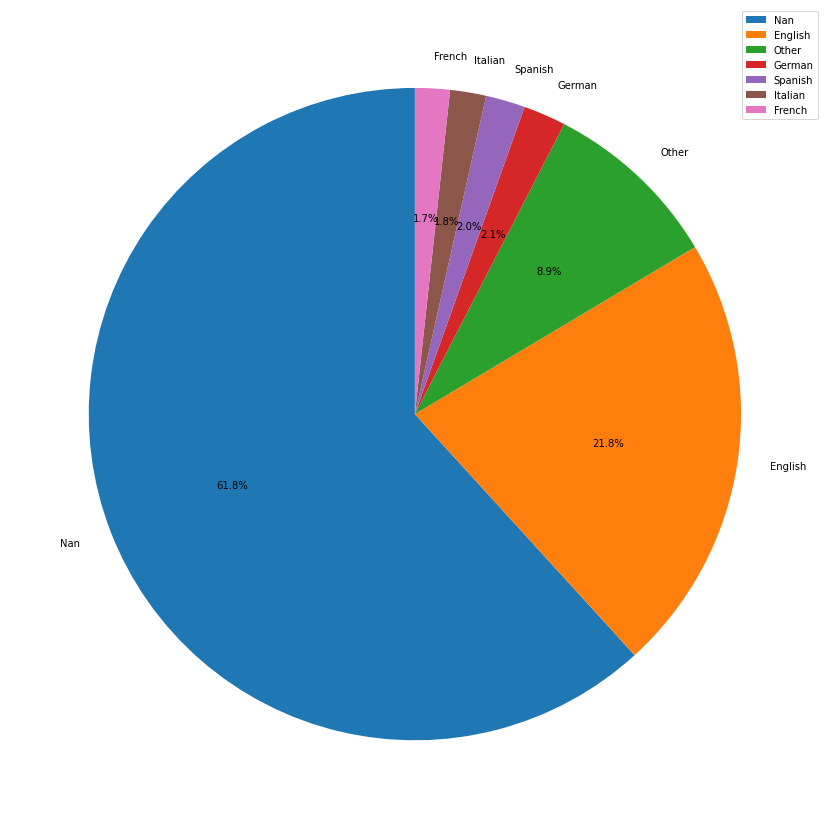

In [17]:
## RQ2- 4: Explore the different languages in the book’s dataset

def language_translate(language):
    if language == 'English' or language == 'eng' or language == 'en' or language == 'en-US' or language == 'en-GB' or language == 'en-CA' or language == 'en-IN':
        return 'English'
    elif language == 'ger':
        return 'German'
    elif language == 'spa':
        return 'Spanish'
    elif language == 'ita':
        return 'Italian'
    elif language == 'fre':
        return 'French'
    elif language == '':
        return 'Nan'
    else:
        return 'Other'


chunks = pd.read_json(filepath_books, lines = True, chunksize = 10000)
final_df = pd.DataFrame()

for chunk in chunks:
    df4 = chunk[['language']].copy()
    df4['language'] = df4['language'].astype(str)
    df4['language'] = df4['language'].map(language_translate)
    grouped = df4.groupby('language').size().reset_index(name='count')
    final_df = final_df.append(grouped)
    
grouped1 = final_df.groupby('language')['count'].sum().reset_index(name='books_num')
final_df = grouped1
final_df.sort_values(by='books_num', ascending=False, inplace=True)
print(tabulate(final_df, headers="keys", tablefmt="psql"))

plt.figure(figsize=(15, 15))
y = np.array(final_df['books_num'])
mylabels = list(final_df['language'])

plt.pie(y, labels = mylabels, startangle = 90, autopct='%1.1f%%')
plt.legend()
plt.show() 

## RQ2- 4: Report

After exploring the data we saw we have more than 200 different languages in our books dataset.  
We decided to show how these languages are distributed according to the top 5 languages in the dataset.  
After finding those top 5 languages we had to convert the names of all languages,  
since Englisg for example has 5 different names which all stand for it.  
In our chart we also plot 'NaN'- which stand for books that has no language value
and 'Other' which stand for all other languages in our dataset.

In [19]:
##RQ2- 5: How many books have more than 250 pages?
chunks = pd.read_json(filepath_books, lines = True, chunksize = 10000)

count = 0
for chunk in chunks:
    df5 = chunk[['num_pages']].copy()
    df5['num_pages'] = pd.to_numeric(df5['num_pages'], errors='coerce')
    count += df5[df5['num_pages'] > 250].shape[0]

print(count)

1810335


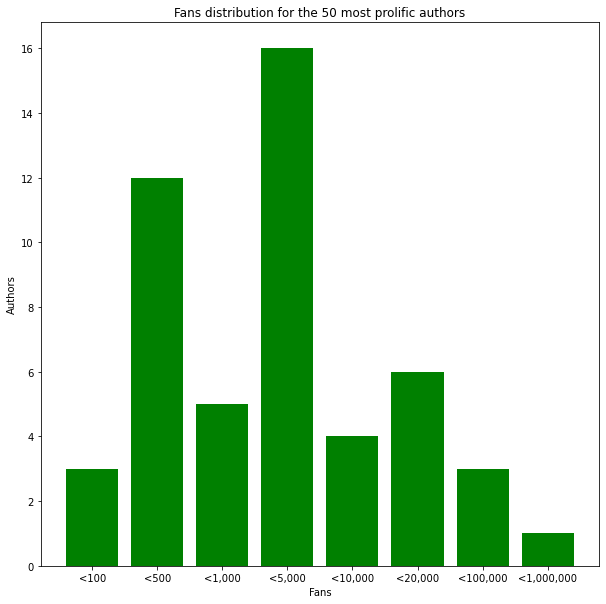

In [18]:
##RQ2- 6: Plot the distribution of the fans count for the 50 most prolific authors

import matplotlib.pyplot as plt

def calc_pos(value: int) -> int:
    if value <= 100:
        return 0
    if value > 100 and value <= 500:
        return 1
    if value > 500 and value <= 1000:
        return 2
    if value > 1000 and value <= 5000:
        return 3
    if value > 5000 and value <= 10000:
        return 4
    if value > 10000 and value <= 20000:
        return 5
    if value > 20000 and value <= 100000:
        return 6
    if value > 100000 and value <= 1000000:
        return 7
    
hist = np.zeros(8)   
df6 = dataset_authors[['book_ids', 'fans_count']].copy()
df6.loc[:, 'book_ids'] = df6['book_ids'].str.len()
df6.sort_values(by='book_ids', ascending=False, inplace=True)
df6 = df6.head(50)
data = df6['fans_count']
for i in data:
    hist[calc_pos(i)] += 1


# x-coordinates of left sides of bars  
left = [1, 2, 3, 4, 5, 6, 7, 8] 

# labels for bars 
tick_label = ['<100', '<500', '<1,000', '<5,000', '<10,000', '<20,000', '<100,000', '<1,000,000'] 
  
# plotting a bar chart
plt.figure(figsize=(10, 10))
plt.bar(left, hist, tick_label = tick_label, 
        width = 0.8, color = ['green']) 
  
# naming the x-axis 
plt.xlabel('Fans') 
# naming the y-axis 
plt.ylabel('Authors') 
# plot title 
plt.title('Fans distribution for the 50 most prolific authors') 
# function to show the plot 
plt.show() 

## RQ2- 6: Report

##### We presented the distribution according to the groups that seemed most significant to us.
##### We chose to divide the autors into the following groups:
1. Authors with less than 100 fans
2. Authors with less than 500 fans and more than 100
3. Authors with less than 1000 fans and more than 500
4. Authors with less than 5000 fans and more than 1000
5. Authors with less than 10000 fans and more than 20000
6. Authors with less than 100000 fans and more than 20000
7. Authors with less than 1000000 fans and more than 100000
